# Capstone Project Week 4 & 5

## Introduction/Business Problem

The city of Toronto is the financial capital of Canada. It has diverse cultures and enormous potential for new businesses. As a global hub of commerce, a lot of people come to the city to look for new opportunities in the market every year. However, great opportunity also means cruel competition. To reduce the risk of failure and explore the benefit as much as we can, careful analysis needs to be done before investing in the real market.

Meanwhile, bubble tea, a popular Taiwanese tea-based drink has become famous throughout the world. Its perfect combination of tea, milk and sugar, together with its different toppings satisfies people's cravings from different continents. A growing number of bubble tea shops have popped up in Toronto in the last couple of years. More and more people enjoy this asian taste during their weekday breaks or weekend free time. We are interested in opening a new bubble tea shop in the city of Toronto and would like to enter the market with a smooth start. Therefore, it is important for us to know about the potential competitors around different boroughs and find the best location for our new shop.

In this project, we will investigate the distribution of bubble tea shops in Toronto and pick the best location to open a new bubble tea shop. 

## Data

# 1. Download and Prepare the Dataset

We are using the same dataset from capstone project week 3 https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import requests

url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wiki_data = pd.read_html(url)
type(wiki_data)

list

In [2]:
df = wiki_data[0]
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Ignore cells with a borough that is Not assigned

In [4]:
df = df[df['Borough']!='Not assigned']
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


Group neighbourhood by postcode

In [5]:
df.set_index(['Postcode','Borough'],inplace=True)
df_merged = df.groupby(level=['Postcode','Borough'], sort=False).agg( ','.join)
df_merged.head()

,,Neighbourhood
Postcode,Borough,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Harbourfront,Regent Park"
M6A,North York,"Lawrence Heights,Lawrence Manor"
M7A,Queen's Park,Not assigned


Reset index

In [6]:
df_merged = df_merged.reset_index()
df_merged.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Not assigned


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [7]:
df_merged.loc[df_merged['Neighbourhood']=="Not assigned",'Neighbourhood']=df_merged.loc[df_merged['Neighbourhood']=="Not assigned",'Borough']
df_merged.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [8]:
df_merged.shape

(103, 3)

There are 103 rows of data

# 2. Download Geospatial Data

In [9]:
geo_data = pd.read_csv("https://cocl.us/Geospatial_data")
geo_data.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


Merge the geo_data and processed data from Section 1

In [10]:
geo_data.rename(columns={'Postal Code':'Postcode'},inplace=True)
# Merging the two columns on 'Postcode'
df_result = pd.merge(df_merged, geo_data, left_on='Postcode', right_on='Postcode')
# Save the Data Frame
df_result.to_csv('neigbourhood_result.csv')
df_result.head()


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


## 3. Explore the Dataset

Total number of boroughs and neighbourhoods

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_result['Borough'].unique()),
        df_result.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [12]:
print('The 11 boroughs:')
print(df_result['Borough'].unique())

The 11 boroughs:
['North York' 'Downtown Toronto' "Queen's Park" 'Etobicoke' 'Scarborough'
 'East York' 'York' 'East Toronto' 'West Toronto' 'Central Toronto'
 'Mississauga']


The GTA (Great Toronto Area ) consists of multiple surrounding areas and cities. We are interested in opening the bubble tea shop in the center of Toronto. Therefore, we filter the dataset to only contain boroughs: Downtown Toronto, East Toronto, West Toronto and Central Toronto.

![title](http://toronto.nustreamrealty.com/wp-content/uploads/gta-map-legend.png)

In [13]:
df_toronto = df_result[(df_result['Borough']=='Downtown Toronto') | (df_result['Borough']=='East Toronto') | (df_result['Borough']=='West Toronto') | (df_result['Borough']=='Central Toronto')]
df_toronto.reset_index(inplace=True, drop=True)
df_toronto = df_toronto.drop(['Postcode'], axis=1)
print(len(df_toronto))
df_toronto.head()

38


,Borough,Neighbourhood,Latitude,Longitude
0,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
1,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
2,Downtown Toronto,St. James Town,43.651494,-79.375418
3,East Toronto,The Beaches,43.676357,-79.293031
4,Downtown Toronto,Berczy Park,43.644771,-79.373306


Install the libraries and configure Foursquare API settings

In [14]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')
print('Libraries imported.')
CLIENT_ID = 'REVIROKJKEXH4BJJPCIMEBQBHCR2SGAFZHEV1TENQBWWMGP3' # your Foursquare ID
CLIENT_SECRET = '2J51ASQK5US5G1PJIDYDX2QDK3MXVGFSDEKX2BOMXPCT2U4S' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

Get latitude and longitude of Toronto

In [15]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print("Toronto","latitude",latitude_toronto, "& " "longitude" ,longitude_toronto)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


Toronto latitude 43.653963 & longitude -79.387207


Create a map of Toronto with neighborhoods superimposed on top

In [16]:
map_toronto = folium.Map(location=[latitude_toronto,longitude_toronto], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [17]:
from folium import plugins
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_toronto,longitude_toronto], zoom_start=11)
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_toronto)
# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(incidents)  
    
map_toronto

## 4. Explore Bubble Tea Shop in All Neighbourhood

Define a method to return revenues with category

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, categoryIds=''):
    
    venues_list=[]
    radiu=3000
    LIMIT=100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        if (categoryIds != ''):
            url = url + '&categoryId={}'
            url = url.format(categoryIds)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
toronto_venues_bts = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude'],
                                   categoryIds='52e81612bcbc57f1066b7a0c'
                                  )

Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide,King,Richmond
Dovercourt Village,Dufferin
Harbourfront East,Toronto Islands,Union Station
Little Portugal,Trinity
The Danforth West,Riverdale
Design Exchange,Toronto Dominion Centre
Brockton,Exhibition Place,Parkdale Village
The Beaches West,India Bazaar
Commerce Court,Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North,Forest Hill West
High Park,The Junction South
North Toronto West
The Annex,North Midtown,Yorkville
Parkdale,Roncesvalles
Davisville
Harbord,University of Toronto
Runnymede,Swansea
Moore Park,Summerhill East
Chinatown,Grange Park,Kensington Market
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown,St. James Town
First Canadian Place,Underground city


In [20]:
print(toronto_venues_bts.shape)
toronto_venues_bts.head()

(1286, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront,Regent Park",43.65426,-79.360636,Chatime 日出茶太,43.655542,-79.384684,Bubble Tea Shop
1,"Harbourfront,Regent Park",43.65426,-79.360636,The Alley,43.665922,-79.385567,Bubble Tea Shop
2,"Harbourfront,Regent Park",43.65426,-79.360636,Sharetea,43.640176,-79.379606,Bubble Tea Shop
3,"Harbourfront,Regent Park",43.65426,-79.360636,Bubble Republic Tea House 奶茶黨部,43.656707,-79.384165,Bubble Tea Shop
4,"Harbourfront,Regent Park",43.65426,-79.360636,Tika Tea House,43.668797,-79.386010,Bubble Tea Shop


Bubble tea shops in each neighbourhood

In [21]:
bts_per_neighbourhoods = toronto_venues_bts['Neighborhood'].value_counts()
print(bts_per_neighbourhoods)

Church and Wellesley                                                                                    71
Central Bay Street                                                                                      71
Harbord,University of Toronto                                                                           69
Chinatown,Grange Park,Kensington Market                                                                 69
Adelaide,King,Richmond                                                                                  69
Ryerson,Garden District                                                                                 69
Commerce Court,Victoria Hotel                                                                           65
St. James Town                                                                                          64
Berczy Park                                                                                             63
First Canadian Place,Underground city

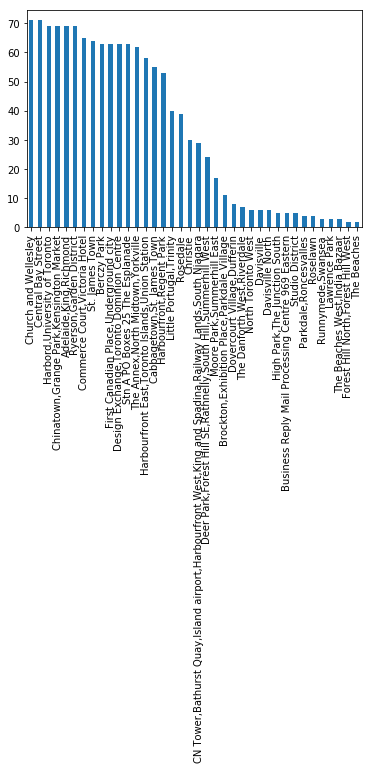

In [23]:
import matplotlib.pyplot as plt

bts_per_neighbourhoods.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## 5. Analyze Each Neighbourhood

In [24]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_bts[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues_bts['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Asian Restaurant,Bakery,Bubble Tea Shop,Café,Chinese Restaurant,Dessert Shop,Frozen Yogurt Shop,Juice Bar,Tea Room,Vietnamese Restaurant
0,"Harbourfront,Regent Park",0,0,1,0,0,0,0,0,0,0
1,"Harbourfront,Regent Park",0,0,1,0,0,0,0,0,0,0
2,"Harbourfront,Regent Park",0,0,1,0,0,0,0,0,0,0
3,"Harbourfront,Regent Park",0,0,1,0,0,0,0,0,0,0
4,"Harbourfront,Regent Park",0,0,1,0,0,0,0,0,0,0


In [25]:
toronto_onehot.shape

(1286, 11)

In [26]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Asian Restaurant,Bakery,Bubble Tea Shop,Café,Chinese Restaurant,Dessert Shop,Frozen Yogurt Shop,Juice Bar,Tea Room,Vietnamese Restaurant
0,"Adelaide,King,Richmond",0.014493,0.014493,0.826087,0.028986,0.014493,0.014493,0.000000,0.028986,0.028986,0.028986
1,Berczy Park,0.015873,0.031746,0.777778,0.031746,0.031746,0.015873,0.000000,0.031746,0.031746,0.031746
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.000000,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909
3,Business Reply Mail Processing Centre 969 Eastern,0.200000,0.200000,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.034483,0.000000,0.724138,0.034483,0.000000,0.000000,0.000000,0.068966,0.068966,0.068966
5,"Cabbagetown,St. James Town",0.018182,0.036364,0.781818,0.036364,0.036364,0.018182,0.000000,0.036364,0.018182,0.018182
6,Central Bay Street,0.014085,0.028169,0.802817,0.028169,0.028169,0.014085,0.000000,0.028169,0.028169,0.028169
7,"Chinatown,Grange Park,Kensington Market",0.014493,0.014493,0.826087,0.028986,0.014493,0.014493,0.000000,0.028986,0.028986,0.028986
8,Christie,0.033333,0.000000,0.800000,0.033333,0.033333,0.000000,0.000000,0.000000,0.066667,0.033333
9,Church and Wellesley,0.014085,0.028169,0.802817,0.028169,0.028169,0.014085,0.000000,0.028169,0.028169,0.028169


In [27]:
toronto_grouped.shape

(38, 11)

Let's print each neighborhood along with the top 5 most common venues

In [28]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                   venue  freq
0        Bubble Tea Shop  0.83
1                   Café  0.03
2              Juice Bar  0.03
3               Tea Room  0.03
4  Vietnamese Restaurant  0.03


----Berczy Park----
                venue  freq
0     Bubble Tea Shop  0.78
1              Bakery  0.03
2                Café  0.03
3  Chinese Restaurant  0.03
4           Juice Bar  0.03


----Brockton,Exhibition Place,Parkdale Village----
                   venue  freq
0        Bubble Tea Shop  0.82
1               Tea Room  0.09
2  Vietnamese Restaurant  0.09
3       Asian Restaurant  0.00
4                 Bakery  0.00


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0     Bubble Tea Shop   0.4
1    Asian Restaurant   0.2
2              Bakery   0.2
3  Chinese Restaurant   0.2
4                Café   0.0


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
               

First, let's write a function to sort the venues in descending order

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Café,Dessert Shop,Chinese Restaurant,Bakery,Asian Restaurant,Frozen Yogurt Shop
1,Berczy Park,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
2,"Brockton,Exhibition Place,Parkdale Village",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Bubble Tea Shop,Chinese Restaurant,Bakery,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Café,Asian Restaurant,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Bakery


In [31]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Café,Dessert Shop,Chinese Restaurant,Bakery,Asian Restaurant,Frozen Yogurt Shop
1,Berczy Park,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
2,"Brockton,Exhibition Place,Parkdale Village",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Bubble Tea Shop,Chinese Restaurant,Bakery,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Café,Asian Restaurant,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Bakery
5,"Cabbagetown,St. James Town",Bubble Tea Shop,Juice Bar,Chinese Restaurant,Café,Bakery,Vietnamese Restaurant,Tea Room,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
6,Central Bay Street,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
7,"Chinatown,Grange Park,Kensington Market",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Café,Dessert Shop,Chinese Restaurant,Bakery,Asian Restaurant,Frozen Yogurt Shop
8,Christie,Bubble Tea Shop,Tea Room,Vietnamese Restaurant,Chinese Restaurant,Café,Asian Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Bakery
9,Church and Wellesley,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop


Cluster Neighbourhood

In [32]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,0,Bubble Tea Shop,Tea Room,Juice Bar,Café,Bakery,Vietnamese Restaurant,Dessert Shop,Chinese Restaurant,Frozen Yogurt Shop,Asian Restaurant
1,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,0,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
2,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
3,East Toronto,The Beaches,43.676357,-79.293031,2,Bubble Tea Shop,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop


Finally, let's visualize the resulting clusters

In [34]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude_toronto,longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [37]:
group1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
group1

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Harbourfront,Regent Park",Bubble Tea Shop,Tea Room,Juice Bar,Café,Bakery,Vietnamese Restaurant,Dessert Shop,Chinese Restaurant,Frozen Yogurt Shop,Asian Restaurant
1,"Ryerson,Garden District",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
2,St. James Town,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
4,Berczy Park,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
5,Central Bay Street,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Bakery,Dessert Shop,Asian Restaurant,Frozen Yogurt Shop
6,Christie,Bubble Tea Shop,Tea Room,Vietnamese Restaurant,Chinese Restaurant,Café,Asian Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Bakery
7,"Adelaide,King,Richmond",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Café,Dessert Shop,Chinese Restaurant,Bakery,Asian Restaurant,Frozen Yogurt Shop
8,"Dovercourt Village,Dufferin",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
9,"Harbourfront East,Toronto Islands,Union Station",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Café,Dessert Shop,Chinese Restaurant,Bakery,Asian Restaurant,Frozen Yogurt Shop
10,"Little Portugal,Trinity",Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Juice Bar,Chinese Restaurant,Café,Asian Restaurant,Frozen Yogurt Shop,Dessert Shop,Bakery


In [38]:
group2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
group2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"High Park,The Junction South",Bubble Tea Shop,Tea Room,Frozen Yogurt Shop,Vietnamese Restaurant,Juice Bar,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
24,"Parkdale,Roncesvalles",Bubble Tea Shop,Tea Room,Frozen Yogurt Shop,Vietnamese Restaurant,Juice Bar,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
27,"Runnymede,Swansea",Tea Room,Frozen Yogurt Shop,Bubble Tea Shop,Vietnamese Restaurant,Juice Bar,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant


In [39]:
group3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
group3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,The Beaches,Bubble Tea Shop,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery


In [40]:
group4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
group4

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"The Beaches West,India Bazaar",Chinese Restaurant,Bubble Tea Shop,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café,Bakery
16,Studio District,Bubble Tea Shop,Chinese Restaurant,Bakery,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café,Asian Restaurant
37,Business Reply Mail Processing Centre 969 Eastern,Bubble Tea Shop,Chinese Restaurant,Bakery,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café


In [41]:
group5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
group5

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Lawrence Park,Bubble Tea Shop,Tea Room,Vietnamese Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
18,Roselawn,Bubble Tea Shop,Tea Room,Vietnamese Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
20,"Forest Hill North,Forest Hill West",Tea Room,Bubble Tea Shop,Vietnamese Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant


Further investigating the venues of neighbourhoods with fewer bubble tea shops

In [44]:
neighbourhoods = [group2, group3, group4, group5]
neighbourhoods = pd.concat(neighbourhoods)
neighbourhoods

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"High Park,The Junction South",Bubble Tea Shop,Tea Room,Frozen Yogurt Shop,Vietnamese Restaurant,Juice Bar,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
24,"Parkdale,Roncesvalles",Bubble Tea Shop,Tea Room,Frozen Yogurt Shop,Vietnamese Restaurant,Juice Bar,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
27,"Runnymede,Swansea",Tea Room,Frozen Yogurt Shop,Bubble Tea Shop,Vietnamese Restaurant,Juice Bar,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
3,The Beaches,Bubble Tea Shop,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery
14,"The Beaches West,India Bazaar",Chinese Restaurant,Bubble Tea Shop,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café,Bakery
16,Studio District,Bubble Tea Shop,Chinese Restaurant,Bakery,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café,Asian Restaurant
37,Business Reply Mail Processing Centre 969 Eastern,Bubble Tea Shop,Chinese Restaurant,Bakery,Asian Restaurant,Vietnamese Restaurant,Tea Room,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Café
17,Lawrence Park,Bubble Tea Shop,Tea Room,Vietnamese Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
18,Roselawn,Bubble Tea Shop,Tea Room,Vietnamese Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant
20,"Forest Hill North,Forest Hill West",Tea Room,Bubble Tea Shop,Vietnamese Restaurant,Juice Bar,Frozen Yogurt Shop,Dessert Shop,Chinese Restaurant,Café,Bakery,Asian Restaurant


In [45]:
nearby_venues = getNearbyVenues(names=neighbourhoods['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude'],
                                   radius=500
                                  )

High Park,The Junction South
Parkdale,Roncesvalles
Runnymede,Swansea
The Beaches
The Beaches West,India Bazaar
Studio District
Business Reply Mail Processing Centre 969 Eastern
Lawrence Park
Roselawn
Forest Hill North,Forest Hill West


In [47]:
# one hot encoding
nearby_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nearby_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nearby_onehot.columns[-1]] + list(nearby_onehot.columns[:-1])
nearby_onehot = nearby_onehot[fixed_columns]

nearby_onehot.head()

,Yoga Studio,American Restaurant,Antique Shop,Aquarium,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,...,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
nearby_grouped = nearby_onehot.groupby('Neighborhood').mean().reset_index()
nearby_grouped

,Neighborhood,Yoga Studio,American Restaurant,Antique Shop,Aquarium,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,...,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0625,0.000000,0.0625,...,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000
1,"Forest Hill North,Forest Hill West",0.000000,0.000000,0.000000,0.05,0.010000,0.00,0.0000,0.000000,0.0000,...,0.010000,0.000000,0.010000,0.00,0.0,0.01,0.010000,0.00,0.00,0.010000
2,"High Park,The Junction South",0.000000,0.000000,0.022222,0.00,0.022222,0.00,0.0000,0.000000,0.0000,...,0.000000,0.000000,0.022222,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000
3,Lawrence Park,0.000000,0.030000,0.000000,0.00,0.010000,0.03,0.0000,0.000000,0.0000,...,0.000000,0.040000,0.010000,0.00,0.0,0.00,0.010000,0.00,0.00,0.010000
4,"Parkdale,Roncesvalles",0.000000,0.010000,0.000000,0.00,0.010000,0.00,0.0000,0.000000,0.0000,...,0.020000,0.010000,0.020000,0.01,0.0,0.00,0.010000,0.01,0.01,0.010000
5,Roselawn,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000
6,"Runnymede,Swansea",0.000000,0.020000,0.000000,0.00,0.010000,0.01,0.0000,0.010000,0.0000,...,0.000000,0.010000,0.010000,0.00,0.0,0.00,0.010000,0.00,0.00,0.010000
7,Studio District,0.012195,0.012195,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.0000,...,0.012195,0.012195,0.000000,0.00,0.0,0.00,0.012195,0.00,0.00,0.012195
8,The Beaches,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.00,0.2,0.00,0.000000,0.00,0.00,0.000000
9,"The Beaches West,India Bazaar",0.000000,0.000000,0.000000,0.00,0.017857,0.00,0.0000,0.017857,0.0000,...,0.017857,0.017857,0.000000,0.00,0.0,0.00,0.017857,0.00,0.00,0.000000


In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nearby_venues_sorted = pd.DataFrame(columns=columns)
nearby_venues_sorted['Neighborhood'] = nearby_grouped['Neighborhood']

for ind in np.arange(nearby_grouped.shape[0]):
    nearby_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nearby_grouped.iloc[ind, :], num_top_venues)

nearby_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Business Reply Mail Processing Centre 969 Eastern,Grocery Store,Café,Park,Convenience Store,Coffee Shop,Nightclub,Athletics & Sports,Baby Store,Diner,Restaurant
1,"Forest Hill North,Forest Hill West",Coffee Shop,Hotel,Aquarium,Café,Italian Restaurant,Bakery,Scenic Lookout,Sporting Goods Shop,Pizza Place,Brewery
2,"High Park,The Junction South",Coffee Shop,Bakery,Café,Park,Mexican Restaurant,Pub,Breakfast Spot,Farmers Market,Event Space,Electronics Store
3,Lawrence Park,Coffee Shop,Café,Steakhouse,Thai Restaurant,Bar,American Restaurant,Restaurant,Breakfast Spot,Asian Restaurant,Hotel
4,"Parkdale,Roncesvalles",Coffee Shop,Clothing Store,Cosmetics Shop,Café,Middle Eastern Restaurant,Bubble Tea Shop,Ramen Restaurant,Japanese Restaurant,Italian Restaurant,Ice Cream Shop
5,Roselawn,Pharmacy,Bakery,Supermarket,Music Venue,Middle Eastern Restaurant,Café,Brewery,Bar,Bank,Park
6,"Runnymede,Swansea",Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Clothing Store,Cocktail Bar,Gastropub,Breakfast Spot,Cosmetics Shop
7,Studio District,Coffee Shop,Café,Ice Cream Shop,Italian Restaurant,Sandwich Place,Burger Joint,Indian Restaurant,Spa,Salad Place,Middle Eastern Restaurant
8,The Beaches,Health Food Store,Other Great Outdoors,Trail,Pub,Deli / Bodega,Eastern European Restaurant,Donut Shop,Discount Store,Diner,Dessert Shop
9,"The Beaches West,India Bazaar",Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Cheese Shop,Café,Farmers Market,Bakery,Steakhouse,Clothing Store


Cluster 2, 3, 4, 5 neighbourhoods have relatively fewer bubble tea shops. There are fewer competitors nearby.

Cluster 2 neighbourhoods:
1. High Park,The Junction South
2. Parkdale,Roncesvalles	
3. Runnymede,Swansea	
There are coffee shops, hotels, bakeries nearby, which indicate people visiting these area usually buy drinks. These places are good choice to open bubble tea shops.

Cluster 3 neighbourhoods: 
1. The Beaches
There are health food store, outdoors, trails, pubs nearby. People visiting this place tend to be more active and pay more attention on their health. Since bubble tea is not considered as a healthy drink. People may not buy bubble tea in this place.

Cluster 4 neighbourhoods:
1. The Beaches West,India Bazaar
2. Studio District	
3. Business Reply Mail Processing Centre 969 Eastern
There are coffee shops, cafes in these locations which means people enjoy coffee at these places. However, there are also beer bars, nightclubs, western style food restaurants at these places, which could be an indicator that people visiting these places may enjoy adult style drinks more often and they may prefer western style food than Taiwanese bubble tea.

Cluster 5 neighbourhoods:
1. Forest Hill North,Forest Hill West
2. Lawrence Park
3. Roselawn
There are coffee shops, hotels, supermarkets and asian style restaurants in these places. People visiting these places may spend more time and enjoy a cup of bubble tea.

In conclusion, cluster 2 and cluster 5 neighbourhoods are better choices to open a new bubble tea shop. It's better if we can obtain more demographics data and crime data of these locations since people from asia tends to buy bubble tea more often than western people and safety of these locations is also an important factor.